In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("../input/brasilian-houses-to-rent/houses_to_rent_v2.csv")
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# EDA :
 I am doing some analysis of data before building the Linear regression model.
 
 let's start with data cleaning and preparation step by step.

In [3]:
# Convert datatype of floor into numeric value.
data['floor'] = pd.to_numeric(data['floor'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  8231 non-null float64
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: float64(1), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

city                      0
area                      0
rooms                     0
bathroom                  0
parking spaces            0
floor                  2461
animal                    0
furniture                 0
hoa (R$)                  0
rent amount (R$)          0
property tax (R$)         0
fire insurance (R$)       0
total (R$)                0
dtype: int64

In [5]:
# in floor I am replacing the null value with 0 as a ground floor.
data = data.fillna(0)
print(len(data))
print(data.describe())

10692
               area         rooms      bathroom  parking spaces         floor  \
count  10692.000000  10692.000000  10692.000000    10692.000000  10692.000000   
mean     149.217920      2.506079      2.236813        1.609147      5.067995   
std      537.016942      1.171266      1.407198        1.589521      6.069050   
min       11.000000      1.000000      1.000000        0.000000      0.000000   
25%       56.000000      2.000000      1.000000        0.000000      1.000000   
50%       90.000000      2.000000      2.000000        1.000000      3.000000   
75%      182.000000      3.000000      3.000000        2.000000      8.000000   
max    46335.000000     13.000000     10.000000       12.000000    301.000000   

           hoa (R$)  rent amount (R$)  property tax (R$)  fire insurance (R$)  \
count  1.069200e+04      10692.000000       10692.000000         10692.000000   
mean   1.174022e+03       3896.247194         366.704358            53.300879   
std    1.559231e+04  

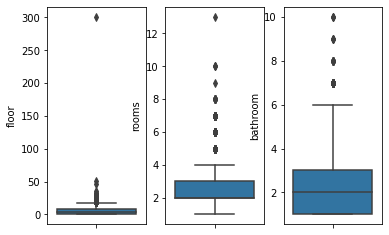

In [34]:
# check the outliers in rooms, bathroom,floor
import seaborn as sns
import matplotlib.pyplot as plot

f,axes = plot.subplots(1,3)

sns.boxplot(y = 'floor', data = data, ax=axes[0])
sns.boxplot(y = 'rooms', data = data, ax = axes[1])
sns.boxplot(y = 'bathroom', data = data, ax = axes[2])


In [7]:
# outlier treatment:

q1 = data.floor.quantile(0.25)
q3 = data.floor.quantile(0.75)
IQR = q3-q1
data_1 = data[(data.floor >= q1-1.5*IQR) & (data.floor <= q3 + 1.5 * IQR)]

q1 = data_1.rooms.quantile(0.25)
q3 = data_1.rooms.quantile(0.75)
IQR = q3-q1
data_1 = data_1[(data_1.rooms >= q1-1.5*IQR) & (data_1.rooms <= q3 + 1.5 * IQR)]

q1 = data_1.bathroom.quantile(0.25)
q3 = data_1.bathroom.quantile(0.75)
IQR = q3-q1
data_1 = data_1[(data_1.bathroom >= q1-1.5*IQR) & (data_1.bathroom <= q3 + 1.5 * IQR)]

print(len(data_1))

f,axes = plot.subplots(1,3)

sns.boxplot(y = 'floor', data = data_1, ax=axes[0])
sns.boxplot(y = 'rooms', data = data_1, ax = axes[1])
sns.boxplot(y = 'bathroom', data = data_1, ax = axes[2])

9969


NameError: name 'plot' is not defined

In [8]:
plot.tight_layout()
sns.distplot(data_1['rent amount (R$)'],bins = 30)

NameError: name 'plot' is not defined

In [9]:
# Data has categorical variable. so I am converting categorical variable into numeric.
data_1 = pd.get_dummies(data = data_1 , columns = ['furniture','animal'])
print(data_1.head())
print(len(data_1))

           city  area  rooms  bathroom  parking spaces  floor  hoa (R$)  \
0     São Paulo    70      2         1               1    7.0      2065   
2  Porto Alegre    80      1         1               1    6.0      1000   
3  Porto Alegre    51      2         1               0    2.0       270   
4     São Paulo    25      1         1               0    1.0         0   
5     São Paulo   376      3         3               7    0.0         0   

   rent amount (R$)  property tax (R$)  fire insurance (R$)  total (R$)  \
0              3300                211                   42        5618   
2              2800                  0                   41        3841   
3              1112                 22                   17        1421   
4               800                 25                   11         836   
5              8000                834                  121        8955   

   furniture_furnished  furniture_not furnished  animal_acept  \
0                    1           

In [10]:
data_1.groupby('city').size()

city
Belo Horizonte    1125
Campinas           826
Porto Alegre      1147
Rio de Janeiro    1462
São Paulo         5409
dtype: int64

In [11]:

# drop the city column.

data_1 = data_1.drop(['city'],axis = 1)

# Need to scale the dataset.

def normalize(x):
    return ((x- np.mean(x))/(max(x)-min(x)))

data_1 = data_1.apply(normalize)
data_1.head()


,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),furniture_furnished,furniture_not furnished,animal_acept,animal_not acept
0,-0.004683,-0.127629,-0.220664,-0.040317,0.127685,0.000816,-0.011546,-0.000382,-0.016594,0.000396,0.755843,-0.755843,0.224897,-0.224897
2,-0.003897,-0.460962,-0.220664,-0.040317,0.072129,-0.000137,-0.028467,-0.001054,-0.018826,-0.001191,-0.244157,0.244157,0.224897,-0.224897
3,-0.006177,-0.127629,-0.220664,-0.123650,-0.150093,-0.000791,-0.085590,-0.000984,-0.072397,-0.003353,-0.244157,0.244157,0.224897,-0.224897
4,-0.008221,-0.460962,-0.220664,-0.123650,-0.205649,-0.001032,-0.096149,-0.000975,-0.085790,-0.003876,-0.244157,0.244157,-0.775103,0.775103
5,0.019371,0.205704,0.179336,0.459683,-0.261204,-0.001032,0.147506,0.001604,0.159745,0.003377,-0.244157,0.244157,0.224897,-0.224897


In [12]:
import seaborn as sns
fig,ax = plot.subplots(figsize=(10,10))
cal_corr = data_1.corr().round(2)
sns.heatmap(cal_corr,annot = True, linewidths = 1, ax=ax)

NameError: name 'plot' is not defined

1. The above correlation matrix shows the relationship between variables ranges from -1 to 1.If value is close to 1 means there is strong relation between two variables.Here we are predicting the rent amount for the house. So We should take only those variables which has strong linear relationship with rent amount for Linear Regression model.  
2. The "area", "rooms","bathroom","parking space","fire insurance" has strong positive correlation with rent amount.
3. The "bathroom" is highly correlated with "rooms" and the "parking spaces" is also  correlated with other variables.This term is called as multicollinearity.We can check it further and take some actions using VIF.


Note : I have try the data with all cities also, I didn't see much difference by keeping only one city.

# Linear Regression :

In [13]:
xData = pd.DataFrame(data_1[['area','rooms','bathroom','parking spaces','fire insurance (R$)','furniture_furnished','furniture_not furnished','hoa (R$)','total (R$)']], columns = ['area','rooms','bathroom','parking spaces','fire insurance (R$)','furniture_furnished','furniture_not furnished','hoa (R$)','total (R$)'])
print(xData.head())
yData = pd.DataFrame(data_1['rent amount (R$)'], columns = ['rent amount (R$)'])
print(yData.head())

       area     rooms  bathroom  parking spaces  fire insurance (R$)  \
0 -0.004683 -0.127629 -0.220664       -0.040317            -0.016594   
2 -0.003897 -0.460962 -0.220664       -0.040317            -0.018826   
3 -0.006177 -0.127629 -0.220664       -0.123650            -0.072397   
4 -0.008221 -0.460962 -0.220664       -0.123650            -0.085790   
5  0.019371  0.205704  0.179336        0.459683             0.159745   

   furniture_furnished  furniture_not furnished  hoa (R$)  total (R$)  
0             0.755843                -0.755843  0.000816    0.000396  
2            -0.244157                 0.244157 -0.000137   -0.001191  
3            -0.244157                 0.244157 -0.000791   -0.003353  
4            -0.244157                 0.244157 -0.001032   -0.003876  
5            -0.244157                 0.244157 -0.001032    0.003377  
   rent amount (R$)
0         -0.011546
2         -0.028467
3         -0.085590
4         -0.096149
5          0.147506


Data is prepared for regression model. Let's split the data into train and test data.
we are splitting the data as 70% train  and 30% test data.

In [14]:
# import the library for spliting the data.
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(xData,yData, train_size = 0.7, test_size = 0.3,random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6978, 9)
(2991, 9)
(6978, 1)
(2991, 1)


In [15]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)

lm_model1 = sm.OLS(y_train,x_train).fit()
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.903e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:02:19   Log-Likelihood:                 18986.
No. Observations:                6978   AIC:                        -3.795e+04
Df Residuals:                    6969   BIC:                        -3.789e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


our model is ready we have 98% of R-square, but the p value of rooms variable is >0.05 which is very high p value. So we
need to remove this variable.

In [16]:
x_train = x_train.drop(['rooms'],1)
lm_model2 = sm.OLS(y_train,x_train).fit()
print(lm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.461e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:02:19   Log-Likelihood:                 18986.
No. Observations:                6978   AIC:                        -3.796e+04
Df Residuals:                    6970   BIC:                        -3.790e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

In [17]:
x_train = x_train.drop(['fire insurance (R$)'],1)
lm_model3 = sm.OLS(y_train,x_train).fit()
print(lm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     2008.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:02:20   Log-Likelihood:                 9145.0
No. Observations:                6978   AIC:                        -1.828e+04
Df Residuals:                    6971   BIC:                        -1.823e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Now I am taking last model lm_model3 for the predictions

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ytrain_predic = lm_model3.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,ytrain_predic))).round(3)
r2 = r2_score(y_train,ytrain_predic).round(3)
print('RMSE for training data is : {}'.format(rmse))
print('r2 for training data is : {}'. format(r2))

# for test dataset we need to drop the columns which we drop during building the model.
x_test_model3 = sm.add_constant(x_test)
x_test_model3 = x_test_model3.drop(['rooms','fire insurance (R$)'], axis = 1)
ytest_predic = lm_model3.predict(x_test_model3)
rmse = (np.sqrt(mean_squared_error(y_test,ytest_predic))).round(3)
r2 = r2_score(y_test,ytest_predic).round(3)
print('RMSE for test data is : {}'.format(rmse))
print('r2 for test data is : {}'. format(r2))

RMSE for training data is : 0.065
r2 for training data is : 0.633
RMSE for test data is : 0.054
r2 for test data is : 0.749


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
